<a href="https://colab.research.google.com/github/maneeshsagar/anlaysisImbalance/blob/main/Ensemble_Techniques_with_New_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program is to develop a neural Network(ANN) regression model . redshift the label/target
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import  MinMaxScaler

import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/train_all_range.csv")

In [ ]:
dataset.shape

(604935, 28)

In [ ]:
dataset.duplicated().sum()

8604

In [ ]:
dataset.drop_duplicates()

,objid,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,zerr,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz,redshift
0,1.240000e+18,22.70128,21.55564,20.74338,19.97239,19.65203,23.26064,22.38317,21.52284,20.75258,...,0.000121,22.128460,21.149510,20.357885,19.812210,22.821905,21.953005,21.137710,20.602890,0.679974
1,1.240000e+18,23.23910,21.44343,19.67306,18.94400,18.55688,23.69614,22.34922,20.59603,19.86871,...,0.000114,22.341265,20.558245,19.308530,18.750440,23.022680,21.472625,20.232370,19.659590,0.412071
2,1.240000e+18,24.05348,21.24721,19.39289,18.68024,18.31429,24.11929,22.13657,20.29977,19.57731,...,0.000068,22.650345,20.320050,19.036565,18.497265,23.127930,21.218170,19.938540,19.384555,0.413140
3,1.240000e+18,26.32478,20.74059,18.99681,18.29084,17.80812,25.19303,21.98622,20.28767,19.56692,...,0.000078,23.532685,19.868700,18.643825,18.049480,23.589625,21.136945,19.927295,19.318555,0.399193
4,1.240000e+18,24.76801,19.32076,17.81846,17.23835,16.92202,24.11602,20.81318,19.32606,18.72738,...,0.000034,22.044385,18.569610,17.528405,17.080185,22.464600,20.069620,19.026720,18.568060,0.253831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604930,1.240000e+18,23.95901,21.45168,20.99064,20.83455,20.90097,24.58145,21.84688,21.45192,21.29986,...,0.008792,22.705345,21.221160,20.912595,20.867760,23.214165,21.649400,21.375890,21.362660,6.911286
604931,1.240000e+18,26.08886,22.08654,21.42736,21.39464,21.62726,25.44403,22.58780,21.98829,21.84853,...,0.001358,24.087700,21.756950,21.411000,21.510950,24.015915,22.288045,21.918410,21.963385,5.464636
604932,1.240000e+18,24.30561,23.59575,21.74487,20.60606,19.91005,24.03291,24.07756,22.41889,21.23574,...,0.001004,23.950680,22.670310,21.175465,20.258055,24.055235,23.248225,21.827315,20.866255,5.350088
604933,1.240000e+18,25.70489,22.18283,21.30940,20.22876,19.21709,23.99918,23.17838,22.30052,21.11168,...,0.000015,23.943860,21.746115,20.769080,19.722925,23.588780,22.739450,21.706100,20.624625,6.964785


In [ ]:
#these columns are not required
dataset.drop(['objid'], axis = 1,inplace=True) #dropping objid column
dataset.drop(['zerr'], axis = 1,inplace=True) #dropping zerr column

In [ ]:
dataset[dataset["modelMag_u"]==-9999]=np.nan
dataset[dataset["modelMag_g"]==-9999]=np.nan
dataset[dataset["modelMag_r"]==-9999]=np.nan
dataset[dataset["modelMag_i"]==-9999]=np.nan
dataset[dataset["modelMag_z"]==-9999]=np.nan
dataset[dataset["fiberMag_u"]==-9999]=np.nan
dataset[dataset["fiberMag_g"]==-9999]=np.nan
dataset[dataset["fiberMag_r"]==-9999]=np.nan
dataset[dataset["fiberMag_i"]==-9999]=np.nan
dataset[dataset["fiberMag_z"]==-9999]=np.nan
dataset[dataset["petroR50_r"]==-9999]=np.nan
dataset[dataset["petroR90_r"]==-9999]=np.nan
dataset[dataset["petroR50_z"]==-9999]=np.nan
dataset[dataset["petroR90_z"]==-9999]=np.nan
dataset[dataset["mmug"]==-9999]=np.nan
dataset[dataset["mmgr"]==-9999]=np.nan
dataset[dataset["mmri"]==-9999]=np.nan
dataset[dataset["mmiz"]==-9999]=np.nan
dataset[dataset["mfug"]==-9999]=np.nan
dataset[dataset["mfgr"]==-9999]=np.nan
dataset[dataset["mfri"]==-9999]=np.nan
dataset[dataset["mfiz"]==-9999]=np.nan
dataset[dataset["r"]==-9999]=np.nan
dataset[dataset["i"]==-9999]=np.nan
dataset[dataset["z"]==-9999]=np.nan
dataset[dataset["redshift"]==-9999]=np.nan
dataset[dataset["redshift"]<0]=np.nan

In [ ]:
#Dropping null values
dataset=dataset.dropna()
dataset.shape

(592312, 26)

Text(0, 0.5, 'Number of samples')

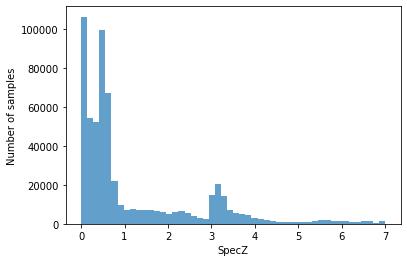

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
dataset['redshift']=np.log1p(dataset['redshift'])

Text(0, 0.5, 'Number of samples')

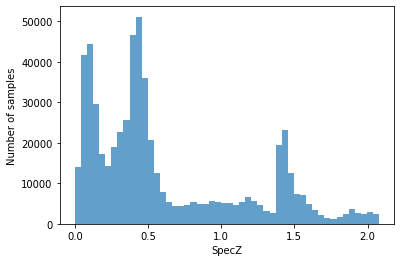

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
X=dataset.drop('redshift',axis=1)
Y=dataset['redshift']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
X.shape

[[0.52146261 0.54076756 0.72287038 ... 0.67401382 0.60656427 0.56828056]
 [0.55332036 0.53514961 0.63798067 ... 0.63220919 0.53051078 0.49029665]
 [0.60156013 0.52532558 0.6157597  ... 0.61006547 0.50582746 0.46755913]
 ...
 [0.61649504 0.6429085  0.80230101 ... 0.78672917 0.66449485 0.59005331]
 [0.69938135 0.5721687  0.76776282 ... 0.74245349 0.65431213 0.57007743]
 [0.44085744 0.49529176 0.69609925 ... 0.58760107 0.58174108 0.58709161]]


(592312, 25)

In [ ]:
# Target vector
y = dataset['redshift']
print(y)

0         0.518778
1         0.345057
2         0.345814
3         0.335896
4         0.226204
            ...   
604928    2.021893
604929    1.965569
604932    1.848469
604933    2.075030
604934    2.004512
Name: redshift, Length: 592312, dtype: float64


In [ ]:
y=y.to_numpy() #pd needs to convert to numpy before applying minmaxscaler
y=y.reshape(-1,1) # this is for using MinMAxscalerr
print(y.shape)

(592312, 1)


In [ ]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
print(y)

[[0.24948083]
 [0.16593821]
 [0.16630224]
 ...
 [0.88892948]
 [0.99788291]
 [0.96397087]]


In [ ]:
#user dfined function for train,test and validation
def my_train_test_split(X, y, ratio_train, ratio_val, seed=42):
    idx = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)

    limit_train = int(ratio_train * X.shape[0])
    limit_val = int((ratio_train + ratio_val) * X.shape[0])

    idx_train = idx[:limit_train]
    idx_val = idx[limit_train:limit_val]
    idx_test = idx[limit_val:]

    X_train, y_train = X[idx_train], y[idx_train]
    X_val, y_val = X[idx_val], y[idx_val]
    X_test, y_test = X[idx_test], y[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = my_train_test_split(X, y, .75,.15,seed=42)

In [ ]:
y_train=y_train.ravel()

In [ ]:
#code for xtratree regressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
import timeit
start = timeit.default_timer()
model = ExtraTreesRegressor(n_estimators=50, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  


Time:  3.89557891165 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.8457821904931889
Mean Absolute Error (best is 0.0): 0.043277036610738485
Mean Squared Error (best is 0.0): 0.009820295813766486
R2 score (best is 1.0): 0.8445229466088714
root Mean Squared Error (best is 0.0): 0.09909740568635733


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  11.752093462992978 %
Total rms:  0    0.099097
dtype: float64
rms w/o outliers 0    0.027768
dtype: float64
Bias:  0   -0.008918
dtype: float64
Bias(median value of delta z): -0.001307319804367539
NMAD:  0.016753421005586144


Text(0, 0.5, 'Predicted')

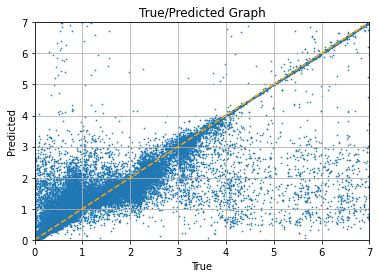

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**Random Forest**

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object

import timeit
start = timeit.default_timer()
model = RandomForestRegressor(n_estimators = 50, random_state = 0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Time:  21.810001267316668 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.8312960853205146
Mean Absolute Error (best is 0.0): 0.048513930712936235
Mean Squared Error (best is 0.0): 0.010706980399102463
R2 score (best is 1.0): 0.830484763927845
root Mean Squared Error (best is 0.0): 0.10347453985934155


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  13.538290113452188 %
Total rms:  0    0.103475
dtype: float64
rms w/o outliers 0    0.029658
dtype: float64
Bias:  0   -0.007159
dtype: float64
Bias(median value of delta z): -0.002395203877008492
NMAD:  0.02090063537868295


Text(0, 0.5, 'Predicted')

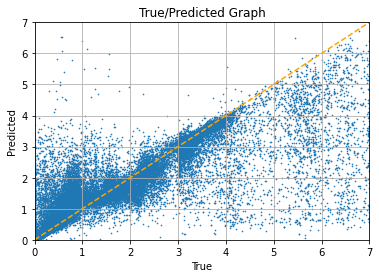

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

import timeit
start = timeit.default_timer()
model =AdaBoostRegressor(random_state=0, n_estimators=50)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Time:  1.023265998849998 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.6188262797491644
Mean Absolute Error (best is 0.0): 0.11078127517907271
Mean Squared Error (best is 0.0): 0.024858542647679695
R2 score (best is 1.0): 0.6064341608690722
root Mean Squared Error (best is 0.0): 0.15766592100920127


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  36.28444084278768 %
Total rms:  0    0.157666
dtype: float64
rms w/o outliers 0    0.052711
dtype: float64
Bias:  0   -0.027977
dtype: float64
Bias(median value of delta z): -0.03618038436497995
NMAD:  0.13900488108649217


Text(0, 0.5, 'Predicted')

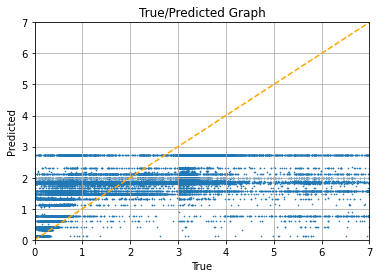

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**XG Boost**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost

import timeit
start = timeit.default_timer()
model = xgboost.XGBRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

[17:48:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time:  9.617860077216669 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.7354962495013202
Mean Absolute Error (best is 0.0): 0.06617661295997271
Mean Squared Error (best is 0.0): 0.01670738584650007
R2 score (best is 1.0): 0.7354850433689547
root Mean Squared Error (best is 0.0): 0.12925705337234045


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  18.037547271745 %
Total rms:  0    0.129257
dtype: float64
rms w/o outliers 0    0.034814
dtype: float64
Bias:  0   -0.000841
dtype: float64
Bias(median value of delta z): -0.006410553576373962
NMAD:  0.03821324082726777


Text(0, 0.5, 'Predicted')

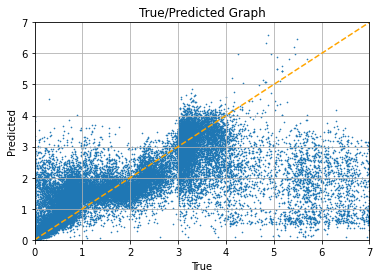

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**CatBoost**

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor

import timeit
start = timeit.default_timer()
model = CatBoostRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Learning rate set to 0.188469
0:	learn: 0.2225872	total: 155ms	remaining: 1m 17s
1:	learn: 0.1994676	total: 259ms	remaining: 1m 4s
2:	learn: 0.1822445	total: 354ms	remaining: 58.6s
3:	learn: 0.1698463	total: 448ms	remaining: 55.5s
4:	learn: 0.1607587	total: 541ms	remaining: 53.5s
5:	learn: 0.1540976	total: 631ms	remaining: 51.9s
6:	learn: 0.1492523	total: 734ms	remaining: 51.7s
7:	learn: 0.1458790	total: 845ms	remaining: 52s
8:	learn: 0.1434934	total: 931ms	remaining: 50.8s
9:	learn: 0.1417008	total: 1.03s	remaining: 50.7s
10:	learn: 0.1403257	total: 1.12s	remaining: 49.9s
11:	learn: 0.1392298	total: 1.22s	remaining: 49.5s
12:	learn: 0.1385583	total: 1.3s	remaining: 48.7s
13:	learn: 0.1379622	total: 1.42s	remaining: 49.2s
14:	learn: 0.1374298	total: 1.62s	remaining: 52.3s
15:	learn: 0.1370943	total: 1.76s	remaining: 53.4s
16:	learn: 0.1367807	total: 1.94s	remaining: 55s
17:	learn: 0.1364989	total: 2.12s	remaining: 56.8s
18:	learn: 0.1362454	total: 2.27s	remaining: 57.5s
19:	learn: 0.13

In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.758527676328941
Mean Absolute Error (best is 0.0): 0.05992815178912866
Mean Squared Error (best is 0.0): 0.015252439534141751
R2 score (best is 1.0): 0.7585200689707954
root Mean Squared Error (best is 0.0): 0.12350076734231959


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  15.7279848730416 %
Total rms:  0    0.123501
dtype: float64
rms w/o outliers 0    0.032364
dtype: float64
Bias:  0   -0.000693
dtype: float64
Bias(median value of delta z): -0.006089473813315413
NMAD:  0.033260148027882415


Text(0, 0.5, 'Predicted')

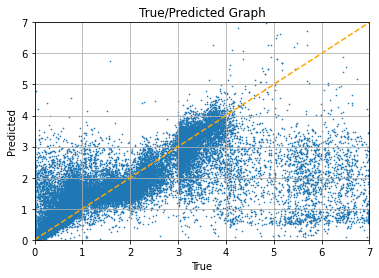

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

import timeit
start = timeit.default_timer()
model = GradientBoostingRegressor(n_estimators=50, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  

Time:  5.980416024650003 minutes


In [ ]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.7059052856415147
Mean Absolute Error (best is 0.0): 0.07322969855659463
Mean Squared Error (best is 0.0): 0.0185765721170496
R2 score (best is 1.0): 0.7058916808984681
root Mean Squared Error (best is 0.0): 0.13629589912044163


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  20.98865478119935 %
Total rms:  0    0.136296
dtype: float64
rms w/o outliers 0    0.035746
dtype: float64
Bias:  0   -0.000927
dtype: float64
Bias(median value of delta z): -0.00860350648448821
NMAD:  0.04639549188092397


Text(0, 0.5, 'Predicted')

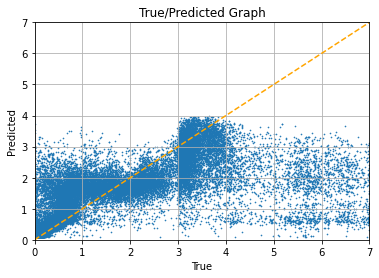

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')